# <center> SVM Exploration  </center>

In this notebook, we will explore a worked example of Linear SVM (Support Vector Machine) in Python and solve it in two ways:<br><br><center><font size="4">Mathematical Equations and Python Programming :)</font></center>

Consider the following features and labels:
<break>$$x = \{(1,0),(1,2),(2,0),(2,2),(3,1),(4,0),(4,2),(5,1)\} $$
    $$y=\{0,0,0,0,1,1,1,1\})$$
<break> $x$ represents the features and $y$ represents the labels respectively. $y=0$ means the sample is negative and $y=1$ means the sample is positive.
    <p> Let's visualize this in Python. </p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

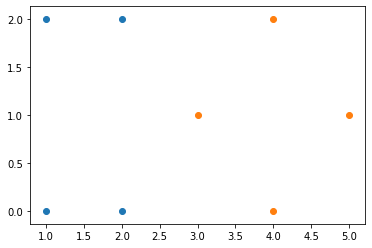

In [2]:
positive = np.array([[1,2],[1,0],[2,2],[2,0]]);
negative = np.array([[3,1],[4,2],[4,0],[5,1]]);

plt.scatter(positive[:,0],positive[:,1])
plt.scatter(negative[:,0],negative[:,1])
plt.show()

We can see we can classify our training set. Now let's do the math:

In [3]:
data=np.array([[1,2],[1,0],[2,2],[2,0],[3,1],[4,2],[4,0],[5,1]])

Adding the bias unit

In [4]:
data_bias = np.ones((data.shape[0],data.shape[1]+1))

In [5]:
data_bias[:,:-1] = data

In [6]:
data_bias

array([[1., 2., 1.],
       [1., 0., 1.],
       [2., 2., 1.],
       [2., 0., 1.],
       [3., 1., 1.],
       [4., 2., 1.],
       [4., 0., 1.],
       [5., 1., 1.]])

Extracting support vectors

In [7]:
data_bias[2:5]

array([[2., 2., 1.],
       [2., 0., 1.],
       [3., 1., 1.]])

In [8]:
support_vector = data_bias[2:5]

In [9]:
support_vector

array([[2., 2., 1.],
       [2., 0., 1.],
       [3., 1., 1.]])

In [10]:
dot_products = np.zeros(support_vector.shape);
dot_products

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
for i in range(len(support_vector)):
    for j in range(len(support_vector)):
        dot_products[i][j] = np.dot(support_vector[i],support_vector[j]) 

In [12]:
dot_products

array([[ 9.,  5.,  9.],
       [ 5.,  5.,  7.],
       [ 9.,  7., 11.]])

In [13]:
labels = [-1,-1,1]

In [14]:
np.linalg.solve(dot_products, labels)

array([ -6., -11.,  12.])

In [15]:
aa1, aa2, aa3 = np.linalg.solve(dot_products, labels)
print(aa1,'\n',aa2,'\n',aa3)

-5.999999999999996 
 -10.99999999999999 
 11.99999999999999


In [16]:
W = aa1*support_vector[0]+aa2*support_vector[1]+aa3*support_vector[2]

In [17]:
coeff = np.array(W[0],W[1])

In [18]:
intercept = W[2]

In [19]:
intercept

-4.9999999999999964

In [20]:
b = intercept/W[0]

$y = a.x - b$

In [21]:
b

-2.4999999999999982

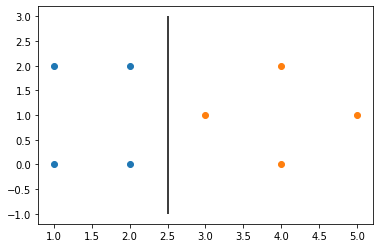

In [22]:
plt.vlines(2.5,-1,3)
plt.scatter(positive[:,0],positive[:,1])
plt.scatter(negative[:,0],negative[:,1])
plt.show()

Now let's use Python built-in package

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random as r
from sklearn import svm

In [24]:
data=np.array([[1,2],[1,0],[2,2],[2,0],[3,1],[4,2],[4,0],[5,1]])

In [25]:
y=[0,0,0,0,1,1,1,1]

In [26]:
clf = svm.SVC(kernel='linear')

In [27]:
clf.fit(data, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
test = [[4,1]]
clf.predict(test)

array([1])

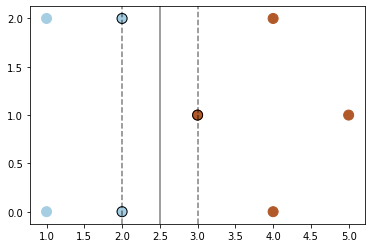

In [29]:
data=np.array([[1,2],[1,0],[2,2],[2,0],[3,1],[4,2],[4,0],[5,1]])
y=np.array([0,0,0,0,1,1,1,1])
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(data, y)
plt.scatter(data[:,0],data[:,1],c=y,s=100,cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
          alpha = 0.5,
          linestyles=['--','-','--'])

ax.scatter(clf.support_vectors_[:, 0],
          clf.support_vectors_[:,1], s=100,
          linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [30]:
clf.coef_

array([[2., 0.]])

In [31]:
clf.intercept_

array([-5.])